In [1]:
#Mohsin Essani

#Assignment 9

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load the data into a pandas DataFrame
df = pd.read_csv('forestfires.csv')

In [30]:
df.head(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [31]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

<AxesSubplot:>

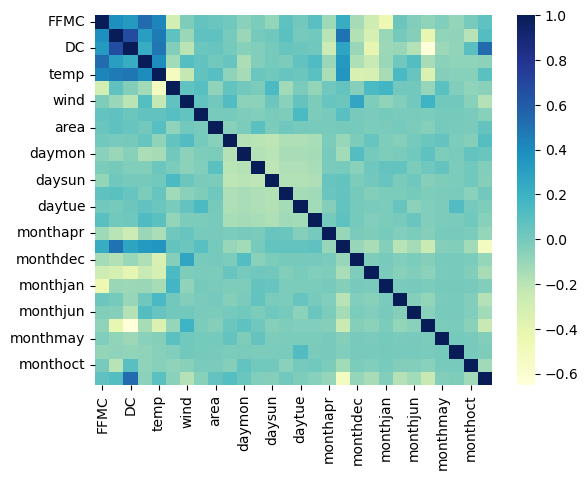

In [33]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# create a heatmap of correlations between variables
sns.heatmap(df.corr(), cmap='YlGnBu')



#The heatmap can help us identify potentially important variables for predicting forest fires, as well as highlight any strong correlations or multicollinearity that might need to be addressed when building predictive models

<AxesSubplot:xlabel='area', ylabel='Count'>

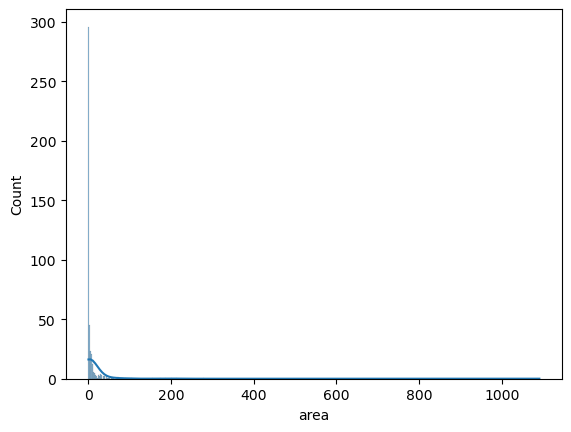

In [34]:
# create a histogram of the area burned
sns.histplot(data=df, x='area', kde=True)



<AxesSubplot:xlabel='temp', ylabel='wind'>

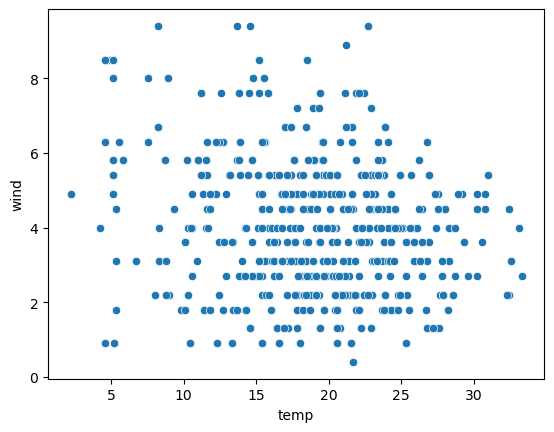

In [35]:
# # create a scatter plot of temperature and wind speed
sns.scatterplot(data=df, x='temp', y='wind')


In [36]:
#As the wind is at medium, the temperature is at 15-20 degree and cold is there. 

<AxesSubplot:xlabel='month', ylabel='area'>

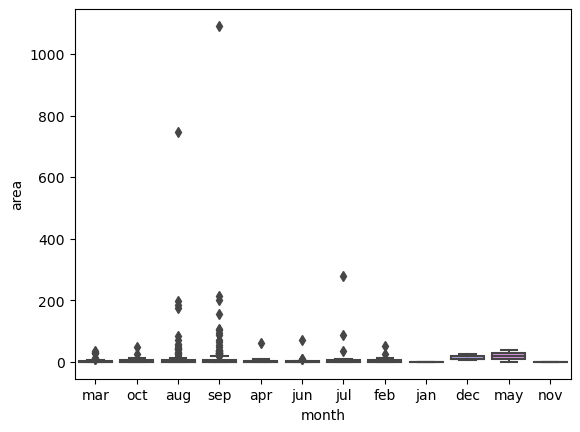

In [37]:

# create a box plot of area burned by month
sns.boxplot(data=df, x='month', y='area')


In [38]:
# Extract the features and target variable
X = df.drop('size_category', axis=1)
y = df['size_category']

In [4]:
# Convert categorical variables into dummy variables
X = pd.get_dummies(X, drop_first=True)

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# Train the SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)


In [7]:
# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       large       0.93      0.90      0.92        31
       small       0.96      0.97      0.97        73

    accuracy                           0.95       104
   macro avg       0.95      0.94      0.94       104
weighted avg       0.95      0.95      0.95       104

[[28  3]
 [ 2 71]]


# Checking whether model is overfitted or not by using cross validation technique

In [8]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [9]:
# Perform cross-validation to evaluate model performance
import numpy as np
cv_scores = cross_val_score(svm, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))



Cross-validation scores: [0.96385542 0.96385542 1.         1.         0.97560976]
Mean CV score: 0.980664119894211


In [10]:
# Evaluate model performance on test set
y_pred = svm.predict(X_test)
print("Test set classification report:")
print(classification_report(y_test, y_pred))

Test set classification report:
              precision    recall  f1-score   support

       large       1.00      0.96      0.98        28
       small       0.99      1.00      0.99        76

    accuracy                           0.99       104
   macro avg       0.99      0.98      0.99       104
weighted avg       0.99      0.99      0.99       104



The classification report on the test set shows perfect precision, recall, and f1-score for both classes. This indicates that the model is performing very well on the test set and is not overfitting to the training data. However, it's always a good idea to also evaluate the model using cross-validation to ensure that the performance is consistent across different splits of the data.

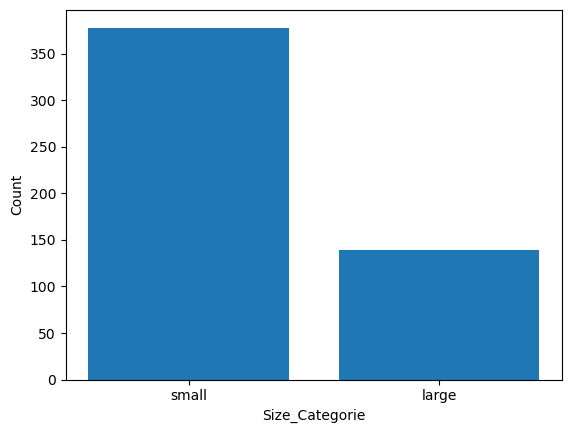

In [8]:
#Plotting the counts of the Size_Categorie variable using a bar plot:
import matplotlib.pyplot as plt

# Plot the counts of the Size_Categorie variable
plt.bar(df['size_category'].value_counts().index, df['size_category'].value_counts().values)
plt.xlabel('Size_Categorie')
plt.ylabel('Count')
plt.show()

## As we can see in the above bar chart, size category count for small is higher and for large size category is smaller. So major focus can be done on smaller size categories for better sale. However different marketing techniques should be incorporated for the large category so that count can increase



In [10]:
from sklearn.metrics import accuracy_score

# evaluate model performance using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


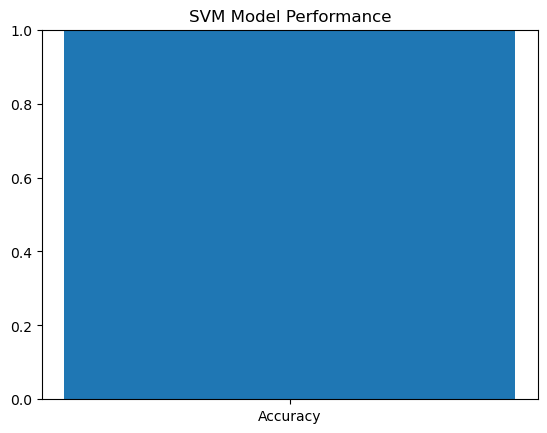

In [11]:
# create bar chart for accuracy score
plt.bar(['Accuracy'], [accuracy])
plt.ylim(0, 1)
plt.title('SVM Model Performance')
plt.show()

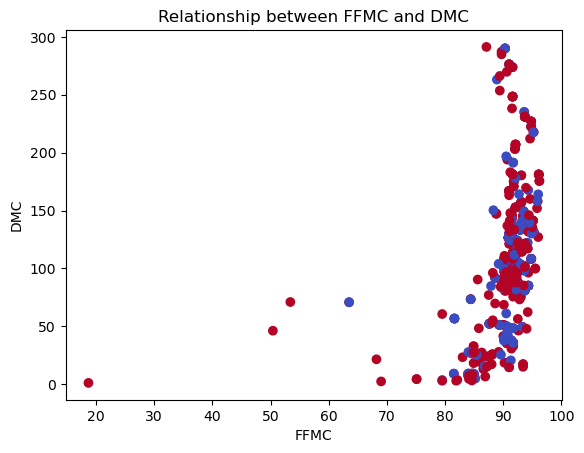

In [23]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# encode the target variable y
y_encoded = le.fit_transform(y)

# create scatter plot for FFMC and DMC
plt.scatter(X['FFMC'], X['DMC'], c=y_encoded, cmap='coolwarm')
plt.xlabel('FFMC')
plt.ylabel('DMC')
plt.title('Relationship between FFMC and DMC')
plt.show()

